# Visualizing the Vectorial Space between Two Protein Families

This notebooks outlines how to visualize the vectorial space between two protein families.

In [1]:
from collections import Counter
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.lines as mlines # Necessary to plot the legend
from mpl_toolkits.mplot3d import Axes3D # Necessary to project in 3d

In [2]:
%matplotlib inline

Read protein vector space

In [3]:
vectors = np.load('kpca.npy')

In [4]:
vectors.shape

(188722, 100)

Read protein family labels

In [5]:
with open('labels.txt') as file:
    protein_labels = file.readlines()
    
protein_families_list = [
    protein_family.strip()
    for protein_family in protein_labels
]

In [6]:
len(protein_families_list)

188722

Dictionary with the different families and the number of proteins for each of them

In [7]:
counter_families = Counter(protein_families_list)

Pick your two favourite families to compare their representations

In [8]:
families_to_compare = ['7tm_6', 'ATE_C']

Get data for visualization by iterating in parallel through the two lists 

In [9]:
full_data = [
    (vector, family_label)
    for vector, family_label in zip(vectors, protein_families_list)
    if family_label in families_to_compare
    # Skip different families than the ones we wanna compare
]

Plot the first three dimensions of the vector to analyze the separation between the two families

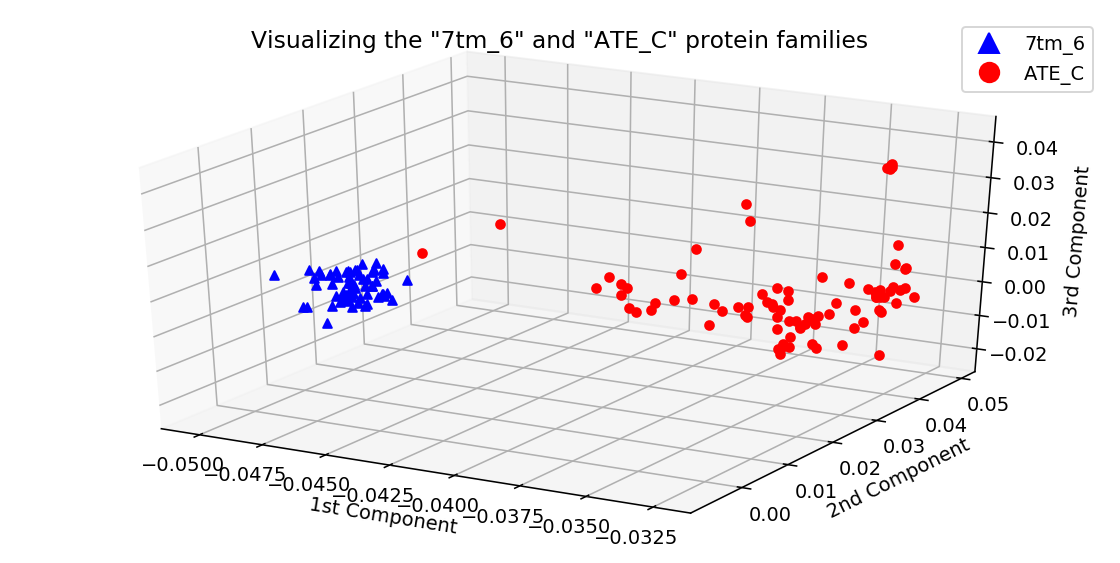

In [10]:
fig = plt.figure(figsize=(10, 5), dpi=140)

ax = plt.gca(projection='3d')
ax.set_title(f'Visualizing the "{families_to_compare[0]}" and "{families_to_compare[1]}" protein families')

# Plot family 1
for vector, family in full_data:
    if family != families_to_compare[0]:
        continue
    ax.scatter(vector[0], vector[1], vector[2], c='blue', marker='^', label=families_to_compare[0])

# Plot family 2
for vector, family in full_data:
    if family != families_to_compare[1]:
        continue
    ax.scatter(vector[0], vector[1], vector[2], c='red', marker='o', label=families_to_compare[1])

ax.set_xlabel('1st Component')
ax.set_ylabel('2nd Component')
ax.set_zlabel('3rd Component')

blue_marker = mlines.Line2D([], [], color='blue', marker='^', linestyle='None',
                          markersize=10, label=families_to_compare[0])
red_marker = mlines.Line2D([], [], color='red', marker='o', linestyle='None',
                          markersize=10, label=families_to_compare[1])

plt.legend(handles=[blue_marker, red_marker])

plt.show()

**Figure 1.** Visualiazing the first three components of the vectors of two different families. A clear separation can be observed by only using the first three components of the vectors. *Note that the vectors of this data set contain up to 100 components.*